Accuracy: 0.7886178861788617


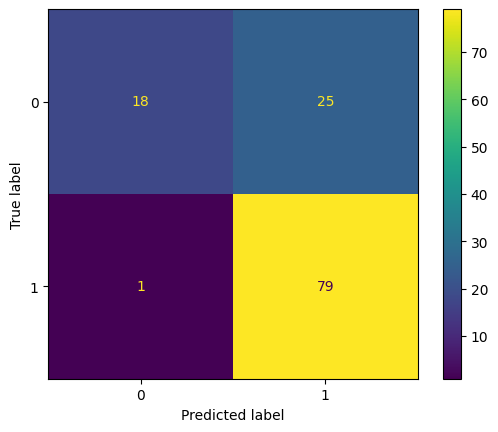

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# ===============================
# 1. Load dataset
# ===============================
df = pd.read_csv("Loan dataset_classification.csv")

# Drop rows where target is missing
df = df.dropna(subset=["Loan_Status"])

# ===============================
# 2. Split features & target
# ===============================
X = df.drop(columns=["Loan_Status", "Loan_ID", "Gender", "Dependents"])
y = df["Loan_Status"].map({"Y": 1, "N": 0})

# ===============================
# 3. Train-test split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===============================
# 4. Column groups
# ===============================
log_cols = ["ApplicantIncome", "CoapplicantIncome"]
num_cols = ["LoanAmount", "Loan_Amount_Term", "Credit_History"]
cat_cols = ["Married", "Education", "Self_Employed", "Property_Area"]

# ===============================
# 5. Pipelines
# ===============================
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

log_numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("log", FunctionTransformer(np.log1p, validate=False)),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# ===============================
# 6. ColumnTransformer
# ===============================
preprocessor = ColumnTransformer([
    ("log_num", log_numeric_pipeline, log_cols),
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols)
])

# ===============================
# 7. Final ML pipeline
# ===============================
model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# ===============================
# 8. Train model
# ===============================
model.fit(X_train, y_train)

# ===============================
# 9. Predictions & Evaluation
# ===============================
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


Accuracy: 0.7317073170731707


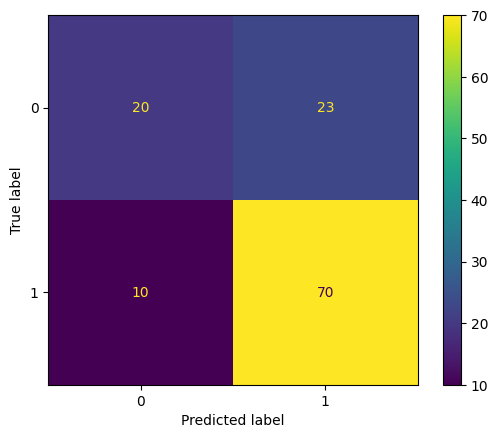

In [3]:
# Applying pipeline on the model dataset
preprocessor = ColumnTransformer([
    ("log_num", log_numeric_pipeline, log_cols),
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols)
])

model_pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", LogisticRegression(class_weight="balanced"))
])


# training the model
model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()




Test Accuracy: 0.7317073170731707

--- Manual Prediction ---
Prediction (1=Approved, 0=Rejected): 1
Approval Probability: 0.73
Loan Status: APPROVED ✅

--- Manual Verification on Test Samples ---
   Actual  Predicted
0       0          0
1       1          1
2       0          1
3       0          0
4       1          1


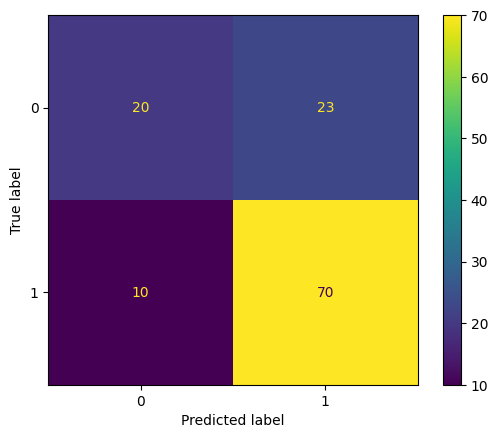

In [6]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# ===============================
# 1. Load dataset
# ===============================
df = pd.read_csv("Loan dataset_classification.csv")

# Drop rows where target is missing
df = df.dropna(subset=["Loan_Status"])

# ===============================
# 2. Features & Target
# ===============================
X = df.drop(columns=["Loan_Status", "Loan_ID", "Gender", "Dependents"])
y = df["Loan_Status"].map({"Y": 1, "N": 0})

# ===============================
# 3. Train-test split
# ===============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===============================
# 4. Column groups
# ===============================
log_cols = ["ApplicantIncome", "CoapplicantIncome"]
num_cols = ["LoanAmount", "Loan_Amount_Term", "Credit_History"]
cat_cols = ["Married", "Education", "Self_Employed", "Property_Area"]

# ===============================
# 5. Pipelines
# ===============================
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

log_numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("log", FunctionTransformer(np.log1p, validate=False)),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# ===============================
# 6. ColumnTransformer
# ===============================
preprocessor = ColumnTransformer([
    ("log_num", log_numeric_pipeline, log_cols),
    ("num", numeric_pipeline, num_cols),
    ("cat", categorical_pipeline, cat_cols)
])

# ===============================
# 7. Final model pipeline
# ===============================
model = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(
        max_iter=1000,
        class_weight="balanced"
    ))
])

# ===============================
# 8. Train model
# ===============================
model.fit(X_train, y_train)

# ===============================
# 9. Model evaluation
# ===============================
y_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

# ===============================
# 10. MANUAL PREDICTION (Custom Input)
# ===============================
manual_input = pd.DataFrame([{
    "Married": "Yes",
    "Education": "Graduate",
    "Self_Employed": "No",
    "Property_Area": "Urban",
    "ApplicantIncome": 5000,
    "CoapplicantIncome": 2000,
    "LoanAmount": 150,
    "Loan_Amount_Term": 360,
    "Credit_History": 1
}])

manual_pred = model.predict(manual_input)
manual_prob = model.predict_proba(manual_input)

print("\n--- Manual Prediction ---")
print("Prediction (1=Approved, 0=Rejected):", manual_pred[0])
print("Approval Probability:", round(manual_prob[0][1], 2))

if manual_pred[0] == 1:
    print("Loan Status: APPROVED ✅")
else:
    print("Loan Status: REJECTED ❌")

# ===============================
# 11. MANUAL VERIFICATION ON REAL TEST DATA
# ===============================
sample_test = X_test.sample(5, random_state=1)

sample_preds = model.predict(sample_test)
sample_actual = y_test.loc[sample_test.index]

comparison = pd.DataFrame({
    "Actual": sample_actual.values,
    "Predicted": sample_preds
})

print("\n--- Manual Verification on Test Samples ---")
print(comparison)
